<a href="https://colab.research.google.com/github/CyndiaChen/Final-Project/blob/main/Final_Project_MUBI_Cyndia_Chen_Lujiajie_Shen_Shuang_Wu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Business Understanding**

In modern society, movie is playing an indivisible role in people's entertaining lives. However, because of the pandemic, the theatre continually shut down. Therefore, online movies become a good option. MUBI is one of them, with a human-curated selection of thirty movies on a daily rotating basis.

MUBI is a global film platform that provides a hand-curated selection of films on demand, streaming ad-free on its proprietary technology, access to its international film criticism and news publication Notebook, and weekly cinema tickets to selected new release films through MUBI GO. MUBI also produces and theatrically distributes films by emerging and world renowned filmmakers, which members can see exclusively on the platform.

MUBI's streaming platform is available in over 190 countries on the web, Roku devices, PlayStation, Amazon Fire TV, Apple TV, LG and Samsung Smart TVs, as well as on mobile devices including iPhone, iPad and Android.
Users of MUBI can watch the movies and review the lastest news, interviews, and criticism. At the same time, there is a global communicty system which allows the users to rate, review, discuss the movies. 

MUBI runs in a membership system. As if you sign on the website, you will have to fill in either the card information or paypal information. New users can have a 30 days free trial. After that, users will be charged automatically for $8.99 per month to freely watch the movies. Some people may leave the website after the free trial while others stay. The differences in membership (charged/free trial) is shown in our dataset.

In this project, we want to study if the differences in membership will result in different preferences on movie, and if the differences are associated with rating on movies. We want to learn more knowledge about the film and movie sector, see what will be the most popular movie. And as MUBI is a membership system, we want to see people’s acceptance to online charged membership, especially for membership that is not related to fundamental needs like food and water.

https://mubi.com/about

https://en.wikipedia.org/wiki/Mubi_(streaming_service)


# **2. Data Understanding**





Our dataset includes three MUBI objects: MUBI movie data, MUBI movie rating dta, and MUBI movie lists data.The movie data includes all movies in MUBI until April 25th 2020. The Ratings data include ratings from April 19th 2020 to April 26th 2020. And the lists data include data from MUBI lists for users from May 1st 2020 to May 3rd 2020.

The table 'movies' contains data from all movies registered on MUBI.
user_id: User ID for the user who created the list

The table 'ratings' contains data from ratings on MUBI for users who did not set their profile in private mode. This table goes back to 2008 and has about 15 million rows.

The table 'ratings_users' is three times smaller than the table 'ratings'. It has a daily granularity. Only the user information related the last rating for a specific day is stored in this table.

The table 'lists' contains data from MUBI lists for users who did not set their profile in private mode.

The table 'lists_users' contains user data related to the created lists for users who did not set their profile in private mode.




In [ ]:
#Create table for the variables, meaning of each varibale and the types of data they are.
import plotly.graph_objects as go

headerColor = 'grey'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['<b>Variables</b>','<b>Meanings</b>','<b>Data type</b>'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['user_id', 'list_id', 'list_title', 'list_movie_number', 'list_update_timestamp_utc', 'list_creation_timestamp_utc', 'list_followers', 'list_url', 'list_comments', 'list_description', 'list_update_date_utc', 'list_creation_date_utc', 'user_trialist', 'user_subscriber', 'user_avatar_image_url', 'user_eligible_for_trial', 'user_has_payment_method', 'movie_title', 'movie_release_year', 'movie_url', 'movie_title_language', 'movie_popularity', 'movie_image_url', 'director_id', 'director_name', 'director_url', 'rating_id', 'rating_url', 'rating_score', 'rating_timestamp_utc', 'critic', 'critic_likes', 'critic_comments'],
      ['User ID for the user who created the list', 'List ID on Mubi', 'Name of the list', 'Number of movies included in the list', 'Last update timestamp for the list', 'Creation timestamp for the list', 'list_followers', 'URL to the list', 'Number of comments on this list', 'Description of the list', 'Last update date for the list', 'Creation date for the list', '1 = the user was a trialist when he created the list 0 = the user was not a trialist when he created the list', '1 = the user was a subscriber when he created the list 0 = the user was not a subscriber when he created the list', 'User profile image URL on Mubi', '1 = the user was eligible for trial when he created the list 0 = the user was not eligible for trial when he created the list', '1 = the user was a paying subscriber when he created the list 0 = the user was not a paying subscriber when he created the list', 'Name of the movie', 'Release year of the movie', 'URL to the movie page on Mubi', 'By default, the title is in English', 'Number of Mubi users who love this movie', 'Image URL to the movie on Mubi', 'ID related to the movie director on Mubi', 'Full Name of the movie director', 'URL to the movie director page on Mubi', 'Rating ID on Mubi', 'URL to the rating on Mubi', 'Rating score ranging from 1 (lowest) to 5 (highest)', 'Timestamp for the movie rating made by the user on Mubi', 'Critic made by the user rating the movie. If value = "None", the user did not write a critic when rating the movie.', 'Number of likes related to the critic made by the user rating the movie', 'Number of comments related to the critic made by the user rating the movie'],
      ['nominal', 'nominal', 'nominal', 'ratio', 'ordinal', 'ordinal', 'ratio', 'nominal', 'ratio', 'nominal', 'ordinal', 'ordinal', 'nomial', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'ordinal', 'nominal', 'nominal', 'ratio', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'nominal', 'ordinal', 'nominal', 'nominal', 'ratio', 'ratio']],
    line_color='darkslategray',
    # 2-D list of colors for alternating rows
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*10],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

Now, we will download the dataset 'MUBI SVOD Platform Database for Movie Lovers' from Kaggle to our colab file. Part of the values in the table is printed as NaN because there are no value for that part. For example, NaN in variable critic means there is no critic on that.

In [ ]:
!mkdir /root/.kaggle
!echo '{"username":"cyndiachen","key":"3e5334ac934219d609c5a76a1b169e8d"}' > /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d clementmsika/mubi-sqlite-database-for-movie-lovers

100% 1.12G/1.12G [00:11<00:00, 109MB/s] 
100% 1.12G/1.12G [00:11<00:00, 107MB/s]


In [ ]:
!unzip \*.zip

Archive:  mubi-sqlite-database-for-movie-lovers.zip
  inflating: mubi_db.sqlite          
  inflating: mubi_lists_data.csv     
  inflating: mubi_lists_user_data.csv  
  inflating: mubi_movie_data.csv     
  inflating: mubi_ratings_data.csv   
  inflating: mubi_ratings_user_data.csv  


In [ ]:
import pandas as pd
d = pd.read_csv('mubi_lists_data.csv')
d.head()

,user_id,list_id,list_title,list_movie_number,list_update_timestamp_utc,list_creation_timestamp_utc,list_followers,list_url,list_comments,list_description,list_cover_image_url,list_first_image_url,list_second_image_url,list_third_image_url
0,85981819,1969,250 Favourite Films,250,2019-11-26 03:20:17,2009-12-18 13:04:48,23,http://mubi.com/lists/250-favourite-films,5,"<p>In a loose order, but an order nonetheless....",https://assets.mubicdn.net/images/film/115/ima...,https://assets.mubicdn.net/images/film/115/ima...,https://assets.mubicdn.net/images/film/3664/im...,https://assets.mubicdn.net/images/film/187/ima...
1,85981819,3946,Films that should be better known,181,2020-05-01 05:54:39,2010-01-30 16:27:27,308,http://mubi.com/lists/films-that-should-be-bet...,11,<p>These are the films that need to be in more...,https://assets.mubicdn.net/images/film/20780/i...,https://assets.mubicdn.net/images/film/20780/i...,https://assets.mubicdn.net/images/film/19167/i...,https://assets.mubicdn.net/images/film/23056/i...
2,85981819,6683,Films by country (completely stolen from Glemaud),179,2020-04-12 08:31:35,2010-03-31 08:55:10,32,http://mubi.com/lists/films-by-country-complet...,5,"<p>Being a compulsive listmaker, cinéphile and...",https://assets.mubicdn.net/images/film/40676/i...,https://assets.mubicdn.net/images/film/40676/i...,https://assets.mubicdn.net/images/film/99891/i...,https://assets.mubicdn.net/images/film/32597/i...
3,85981819,8865,Play it cool.,56,2018-12-14 14:53:41,2010-05-10 08:18:40,10,http://mubi.com/lists/play-it-cool,1,<p>A work in progress…</p>\n<p>This is intende...,https://assets.mubicdn.net/images/film/11573/i...,https://assets.mubicdn.net/images/film/11573/i...,https://assets.mubicdn.net/images/film/25451/i...,https://assets.mubicdn.net/images/film/1418/im...
4,85981819,13796,Cinemalism (work in progress),121,2019-11-26 03:20:23,2010-08-25 14:23:56,43,http://mubi.com/lists/cinemalism-work-in-progress,3,<p>An ongoing list collecting the best in mini...,https://assets.mubicdn.net/images/film/113749/...,https://assets.mubicdn.net/images/film/113749/...,https://assets.mubicdn.net/images/film/160533/...,https://assets.mubicdn.net/images/film/95112/i...


In [ ]:
print(d.columns)

Index(['user_id', 'list_id', 'list_title', 'list_movie_number',
       'list_update_timestamp_utc', 'list_creation_timestamp_utc',
       'list_followers', 'list_url', 'list_comments', 'list_description',
       'list_cover_image_url', 'list_first_image_url', 'list_second_image_url',
       'list_third_image_url'],
      dtype='object')


Note: In the pure csv files, variables like 'user_eligible_for_trial' whose original values are 0 and 1 changed. 0 becomes False and 1 becomes True in the dataframes.

In [ ]:
import pandas as pd
d1 = pd.read_csv('mubi_lists_user_data.csv')
d1.head()

,user_id,list_id,list_update_date_utc,list_creation_date_utc,user_trialist,user_subscriber,user_avatar_image_url,user_cover_image_url,user_eligible_for_trial,user_has_payment_method
0,85981819,1969,2019-11-26,2009-12-18,True,True,https://assets.mubicdn.net/images/avatars/7498...,NaN,False,True
1,85981819,3946,2020-05-01,2010-01-30,True,True,https://assets.mubicdn.net/images/avatars/7498...,NaN,False,True
2,85981819,6683,2020-04-12,2010-03-31,True,True,https://assets.mubicdn.net/images/avatars/7498...,NaN,False,True
3,85981819,8865,2018-12-14,2010-05-10,True,True,https://assets.mubicdn.net/images/avatars/7498...,NaN,False,True
4,85981819,13796,2019-11-26,2010-08-25,True,True,https://assets.mubicdn.net/images/avatars/7498...,NaN,False,True


In [ ]:
print(d1.columns)

Index(['user_id', 'list_id', 'list_update_date_utc', 'list_creation_date_utc',
       'user_trialist', 'user_subscriber', 'user_avatar_image_url',
       'user_cover_image_url', 'user_eligible_for_trial',
       'user_has_payment_method'],
      dtype='object')


In [ ]:
d2 = pd.read_csv('mubi_movie_data.csv')
d2.head()

,movie_id,movie_title,movie_release_year,movie_url,movie_title_language,movie_popularity,movie_image_url,director_id,director_name,director_url
0,1,La Antena,2007.0,http://mubi.com/films/la-antena,en,105,https://images.mubicdn.net/images/film/1/cache...,131,Esteban Sapir,http://mubi.com/cast/esteban-sapir
1,2,Elementary Particles,2006.0,http://mubi.com/films/elementary-particles,en,23,https://images.mubicdn.net/images/film/2/cache...,73,Oskar Roehler,http://mubi.com/cast/oskar-roehler
2,3,It's Winter,2006.0,http://mubi.com/films/its-winter,en,21,https://images.mubicdn.net/images/film/3/cache...,82,Rafi Pitts,http://mubi.com/cast/rafi-pitts
3,4,Kirikou and the Wild Beasts,2005.0,http://mubi.com/films/kirikou-and-the-wild-beasts,en,46,https://images.mubicdn.net/images/film/4/cache...,"89, 90","Michel Ocelot, Bénédicte Galup","http://mubi.com/cast/michel-ocelot, http://mub..."
4,5,Padre Nuestro,2007.0,http://mubi.com/films/padre-nuestro,en,7,https://images.mubicdn.net/images/film/5/cache...,92,Christopher Zalla,http://mubi.com/cast/christopher-zalla


In [ ]:
print(d2.columns)

Index(['movie_id', 'movie_title', 'movie_release_year', 'movie_url',
       'movie_title_language', 'movie_popularity', 'movie_image_url',
       'director_id', 'director_name', 'director_url'],
      dtype='object')


In [ ]:
d3 = pd.read_csv('mubi_ratings_data.csv')
d3.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



,movie_id,rating_id,rating_url,rating_score,rating_timestamp_utc,critic,critic_likes,critic_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,1066,15610495,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2017-06-10 12:38:33,NaN,0,0,41579158,False,False,True,False
1,1066,10704606,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-08-15 23:42:31,NaN,0,0,85981819,True,True,False,True
2,1066,10177114,http://mubi.com/films/pavee-lackeen-the-travel...,2.0,2014-01-30 13:21:57,NaN,0,0,4208563,False,False,True,True
3,1066,10130280,http://mubi.com/films/pavee-lackeen-the-travel...,3.0,2014-01-19 01:04:23,I am a bit disappointed by this documentary fi...,0,0,9820140,False,False,True,False
4,1066,8357049,http://mubi.com/films/pavee-lackeen-the-travel...,4.0,2012-10-02 18:28:47,NaN,0,0,68654088,False,False,True,True


In [ ]:
print(d3.columns)

Index(['movie_id', 'rating_id', 'rating_url', 'rating_score',
       'rating_timestamp_utc', 'critic', 'critic_likes', 'critic_comments',
       'user_id', 'user_trialist', 'user_subscriber',
       'user_eligible_for_trial', 'user_has_payment_method'],
      dtype='object')


In [ ]:
d4 = pd.read_csv('mubi_ratings_user_data.csv')
d4.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,6,7) have mixed types.Specify dtype option on import or set low_memory=False.



,user_id,rating_date_utc,user_trialist,user_subscriber,user_avatar_image_url,user_cover_image_url,user_eligible_for_trial,user_has_payment_method
0,41579158,2017-06-10,False,False,https://assets.mubicdn.net/images/avatars/7428...,NaN,True,False
1,68654088,2012-10-02,False,False,https://assets.mubicdn.net/images/avatars/2771...,NaN,True,True
2,84114365,2010-12-25,False,False,https://assets.mubicdn.net/images/avatars/1808...,NaN,True,False
3,29755671,2010-11-15,False,False,//mubi.com/assets/placeholders/avatar-c68833ee...,NaN,True,False
4,93302487,2010-01-05,False,False,https://assets.mubicdn.net/images/avatars/1224...,NaN,True,False


In [ ]:
print(d4.columns)

Index(['user_id', 'rating_date_utc', 'user_trialist', 'user_subscriber',
       'user_avatar_image_url', 'user_cover_image_url',
       'user_eligible_for_trial', 'user_has_payment_method'],
      dtype='object')


# **3. Data Preparation**

Our group deleted all the URL link columns because they are not helpful with data analysis. 

In [ ]:
#delete list_url, list_cover_image_url, list_first_image_url, list_second_image_url, list_third_image_url columns
del d['list_url']
del d['list_cover_image_url']
del d['list_first_image_url']
del d['list_second_image_url']
del d['list_third_image_url']
d.head()

,user_id,list_id,list_title,list_movie_number,list_update_timestamp_utc,list_creation_timestamp_utc,list_followers,list_comments,list_description
0,85981819,1969,250 Favourite Films,250,2019-11-26 03:20:17,2009-12-18 13:04:48,23,5,"<p>In a loose order, but an order nonetheless...."
1,85981819,3946,Films that should be better known,181,2020-05-01 05:54:39,2010-01-30 16:27:27,308,11,<p>These are the films that need to be in more...
2,85981819,6683,Films by country (completely stolen from Glemaud),179,2020-04-12 08:31:35,2010-03-31 08:55:10,32,5,"<p>Being a compulsive listmaker, cinéphile and..."
3,85981819,8865,Play it cool.,56,2018-12-14 14:53:41,2010-05-10 08:18:40,10,1,<p>A work in progress…</p>\n<p>This is intende...
4,85981819,13796,Cinemalism (work in progress),121,2019-11-26 03:20:23,2010-08-25 14:23:56,43,3,<p>An ongoing list collecting the best in mini...


In [ ]:
print(d)

        user_id  ...                                   list_description
0      85981819  ...  <p>In a loose order, but an order nonetheless....
1      85981819  ...  <p>These are the films that need to be in more...
2      85981819  ...  <p>Being a compulsive listmaker, cinéphile and...
3      85981819  ...  <p>A work in progress…</p>\n<p>This is intende...
4      85981819  ...  <p>An ongoing list collecting the best in mini...
...         ...  ...                                                ...
80306  77265912  ...                                                NaN
80307  74636861  ...                                                NaN
80308  15089938  ...                                                NaN
80309  12567302  ...  <p>peluang usaha ahasu gnaulep <br>\ncheat gam...
80310  26743636  ...                                                NaN

[80311 rows x 9 columns]


In [ ]:
#delete user_avatar_image_url, user_cover_image_url
del d1['user_avatar_image_url']
del d1['user_cover_image_url']
d1.head()

,user_id,list_id,list_update_date_utc,list_creation_date_utc,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,85981819,1969,2019-11-26,2009-12-18,True,True,False,True
1,85981819,3946,2020-05-01,2010-01-30,True,True,False,True
2,85981819,6683,2020-04-12,2010-03-31,True,True,False,True
3,85981819,8865,2018-12-14,2010-05-10,True,True,False,True
4,85981819,13796,2019-11-26,2010-08-25,True,True,False,True


In [ ]:
print(d1)

        user_id  list_id  ... user_eligible_for_trial user_has_payment_method
0      85981819     1969  ...                   False                    True
1      85981819     3946  ...                   False                    True
2      85981819     6683  ...                   False                    True
3      85981819     8865  ...                   False                    True
4      85981819    13796  ...                   False                    True
...         ...      ...  ...                     ...                     ...
80306  77265912     4091  ...                    True                   False
80307  74636861     3183  ...                    True                   False
80308  15089938    46648  ...                    True                   False
80309  12567302     3181  ...                    True                   False
80310  26743636      990  ...                    True                   False

[80311 rows x 8 columns]


In [ ]:
#delete movie_url, movie_image_url, director_url
del d2['movie_url']
del d2['movie_image_url']
del d2['director_url']
d2.head()

,movie_id,movie_title,movie_release_year,movie_title_language,movie_popularity,director_id,director_name
0,1,La Antena,2007.0,en,105,131,Esteban Sapir
1,2,Elementary Particles,2006.0,en,23,73,Oskar Roehler
2,3,It's Winter,2006.0,en,21,82,Rafi Pitts
3,4,Kirikou and the Wild Beasts,2005.0,en,46,"89, 90","Michel Ocelot, Bénédicte Galup"
4,5,Padre Nuestro,2007.0,en,7,92,Christopher Zalla


In [ ]:
#delete rating_url
del d3['rating_url']
d3.head()

,movie_id,rating_id,rating_score,rating_timestamp_utc,critic,critic_likes,critic_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,1066,15610495,3.0,2017-06-10 12:38:33,NaN,0,0,41579158,False,False,True,False
1,1066,10704606,2.0,2014-08-15 23:42:31,NaN,0,0,85981819,True,True,False,True
2,1066,10177114,2.0,2014-01-30 13:21:57,NaN,0,0,4208563,False,False,True,True
3,1066,10130280,3.0,2014-01-19 01:04:23,I am a bit disappointed by this documentary fi...,0,0,9820140,False,False,True,False
4,1066,8357049,4.0,2012-10-02 18:28:47,NaN,0,0,68654088,False,False,True,True


In [ ]:
#delete user_avatar_image_url, user_cover_image_url
del d4['user_avatar_image_url']
del d4['user_cover_image_url']
d4.head()

,user_id,rating_date_utc,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,41579158,2017-06-10,False,False,True,False
1,68654088,2012-10-02,False,False,True,True
2,84114365,2010-12-25,False,False,True,False
3,29755671,2010-11-15,False,False,True,False
4,93302487,2010-01-05,False,False,True,False


As all information in dataframe d4 is included in d3, we will not use it in the following steps.

Our group decided to merge d and d1 according to the user_id.

In [ ]:
m1 = pd.merge(d, d1)
m1.head()

,user_id,list_id,list_title,list_movie_number,list_update_timestamp_utc,list_creation_timestamp_utc,list_followers,list_comments,list_description,list_update_date_utc,list_creation_date_utc,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
0,85981819,1969,250 Favourite Films,250,2019-11-26 03:20:17,2009-12-18 13:04:48,23,5,"<p>In a loose order, but an order nonetheless....",2019-11-26,2009-12-18,True,True,False,True
1,85981819,3946,Films that should be better known,181,2020-05-01 05:54:39,2010-01-30 16:27:27,308,11,<p>These are the films that need to be in more...,2020-05-01,2010-01-30,True,True,False,True
2,85981819,6683,Films by country (completely stolen from Glemaud),179,2020-04-12 08:31:35,2010-03-31 08:55:10,32,5,"<p>Being a compulsive listmaker, cinéphile and...",2020-04-12,2010-03-31,True,True,False,True
3,85981819,8865,Play it cool.,56,2018-12-14 14:53:41,2010-05-10 08:18:40,10,1,<p>A work in progress…</p>\n<p>This is intende...,2018-12-14,2010-05-10,True,True,False,True
4,85981819,13796,Cinemalism (work in progress),121,2019-11-26 03:20:23,2010-08-25 14:23:56,43,3,<p>An ongoing list collecting the best in mini...,2019-11-26,2010-08-25,True,True,False,True


Our group decided to merge d2 and d3 according to the user_id.

In [ ]:
m2 = pd.merge(d2, d3)
m2 = m2.sample(n=2000)
print(m2)

          movie_id  ... user_has_payment_method
13274853    103259  ...                    True
15194768    193585  ...                    True
10707873     29110  ...                   False
7098739       3506  ...                   False
7335034       3754  ...                   False
...            ...  ...                     ...
9197562      21279  ...                    True
13345899    104599  ...                    True
4713844       1728  ...                   False
14170992    124552  ...                    True
10115972     25522  ...                    True

[2000 rows x 18 columns]


# **4. Modeling and Evaluating**

Firstly, We are curious about the number of movies released every year. Since as we all know, movie holds a considerable percent in people’e entertaining lives, especially today. Additionally, the development of internet and social media make the movie industry more and more profitable, therefore the percentage change of the number of movie released every year is an interesting topic to explore. 

Text(0.5, 1.0, 'movie release year')

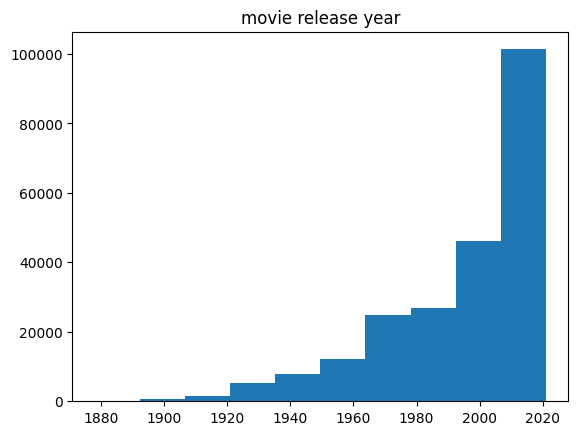

In [ ]:
import matplotlib.pyplot as plt; 
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.hist(d2.movie_release_year)
plt.title('movie release year')

The histogram above shows the number of movies released each year. As the year increases, the number of movies released increased.

The website categorizes consumers with four criteria: whether the user was a trialist when he rated the movie, whether user was a subscriber when he rated the movie, whether the user was eligible for trial when he rated the movie, and the user was a paying subscriber when he rated the movie. By using pie chart, we can see the percentage those user hold clearly. 

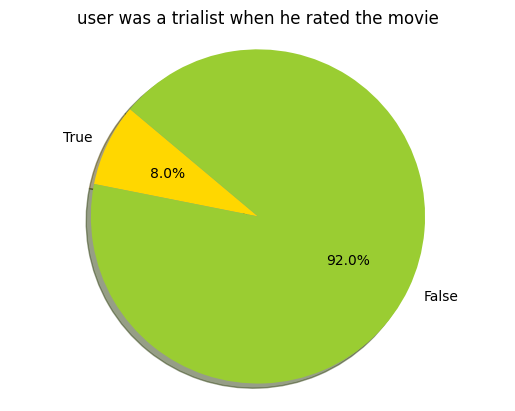

In [ ]:
# Data to plot
labels = 'True', 'False'
sizes = [8 , 92]
colors = ['gold','yellowgreen']
explode = (0, 0)
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('user was a trialist when he rated the movie')
plt.show()

Most of people rated the movie when they are not in trial list. There is definitely correlation behind it, since users who have stronger opinions or preference on movie are highly likely to be a formal member. 

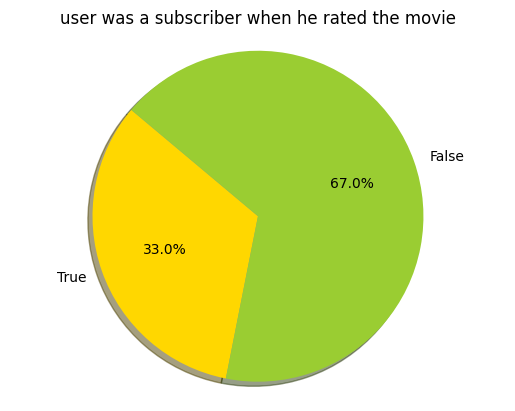

In [ ]:
sizes = [33,67]
colors = ['gold', 'yellowgreen']
explode = (0, 0)
plt.pie(sizes, explode=explode,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('user was a subscriber when he rated the movie')
plt.show()

The number of user is not a subscriber when he rated the movie is surprisingly high. Therefore, there are more tourists viewing the website than we expect, maybe they are audiences specifically interested in some movies. From the perspective of adversing, website manager can come up with a way to attract tourists to subscribe and stay in the website for longer time. 


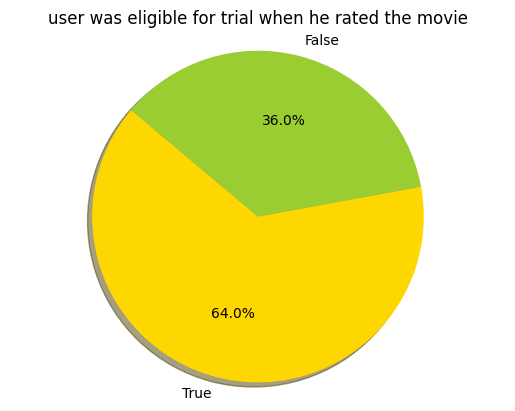

In [ ]:
sizes = [64,36]
colors = ['gold', 'yellowgreen']
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('user was eligible for trial when he rated the movie')
plt.show()

The number of user was eligible for trial when he rated the movie means they are new users. As we stated above, there are many tourists to the website now. 


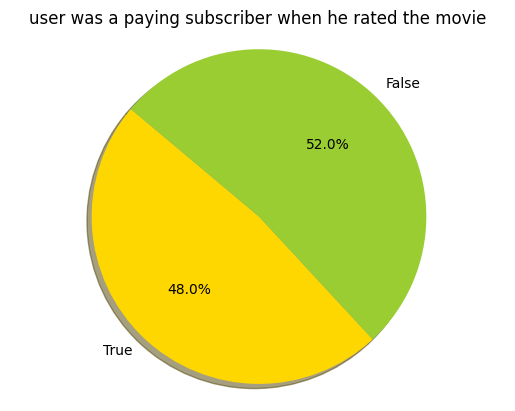

In [ ]:
sizes = [48,52]
colors = ['gold', 'yellowgreen']
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('user was a paying subscriber when he rated the movie')
plt.show()


The distribution of whether the user was a paying subscriber is pretty even, showing a steady development of the website. 

In [ ]:
# Import seaborn and apply its plotting styles
import seaborn as sns
import numpy as np
sns.set()
# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

MUBI allows users to collect movies into a private/public list. People can follow or comment on the public lists. We want to see if there is a difference on this between people who use free trial and people who pay for the membership. All data here comes from the table m1.

This is the graph for trialist users. The blue points (False) means the user pay for the membership when create the list, and the red points (True) means the user is in free trial when create the list. Points on the x=y line indicates the lists that have the most followers and comments. We can see the situation is quite similar between trialist and not trialist in that section. However, blue points occupy more space overall and they diffused outward in a greater degree than the red points. In the bottom left corner, both blue points and red points accumulate. This happens as many new users would like to create a list in the begining. And people are more likely to be interested in a new website. But as time passes, and we assume the lists have large number of comments and followers are the precisely chosen ones, people who pay for the membership see what people really like. They then create more popular lists. Therefore, we may say people spend money for the membership are more active in MUBI as they follow and comment more.

Text(0.5, 1.0, 'number of comments and followers of list created by trialist/not trialist')

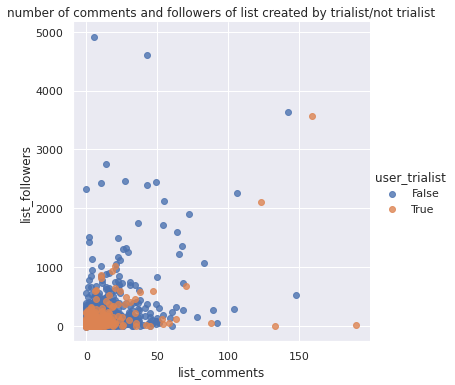

In [ ]:
sns.lmplot(x='list_comments', y='list_followers', hue='user_trialist', data=m1, fit_reg=False)
plt.title('number of comments and followers of list created by trialist/not trialist')

In table d3, rating scores from different users to movies are presented. There are many different rates towards the same movie. To study each movie, we dicide to find the average rating score for each movie id.

In [ ]:
data = d3.groupby("movie_id")["rating_score"].mean().reset_index()
print(data)

        movie_id  rating_score
0              0      3.000000
1              1      3.782705
2              2      2.872385
3              3      3.424731
4              4      3.800895
...          ...           ...
142693    263692      4.000000
142694    263693      2.000000
142695    263701      3.000000
142696    263708      3.000000
142697    263709      2.000000

[142698 rows x 2 columns]


Next, we rank the average rating score in the table 'data'. Then we extract the rows which the average rating score is 5.0. Unlike the other rankings, there are many more top 1 scores (5.0) and therefore they are all rank as 1928.5. In total, there are 3856 movies having a 5.0 average rating score.

In [ ]:
data['rank'] = data['rating_score'].rank(ascending=False)
data.loc[(data['rating_score']>=5.0)]

,movie_id,rating_score,rank
87,87,5.0,1928.5
127,127,5.0,1928.5
132,132,5.0,1928.5
2707,2912,5.0,1928.5
3716,4005,5.0,1928.5
...,...,...,...
142623,263380,5.0,1928.5
142624,263393,5.0,1928.5
142674,263635,5.0,1928.5
142683,263672,5.0,1928.5


Now, the average rating socre is presented in the table 'data'. Each average rating score is connected with one specific movie id. Next, we want to draw a histogram using the new table.

From this histogram, we can see most movies receive rating scores around 3.0 to 3.5. And the movies that have an average rating socres around 4.5 and 1.5 are the least. Although this graph seems a bit symmetrical, it skews relatively toward right hand side, meaning there are more good movies than bad movies. Otherwise, it can indicate that people are more likely to give a better rate than a bad rate.

Text(0.5, 1.0, 'average rating score of movies')

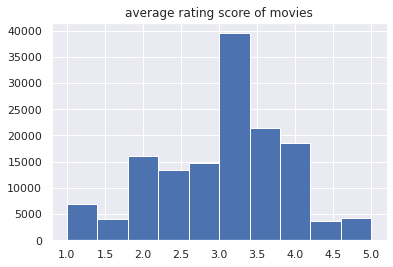

In [ ]:
# Import seaborn and apply its plotting styles
import seaborn as sns
import numpy as np
sns.set()
# This line allows matplotlib plots to appear as images in the notebook
# instead of in a separate window.
%matplotlib inline

# plt is a commonly used shortcut for matplotlib
import matplotlib.pyplot as plt

plt.hist(data.rating_score)
plt.title('average rating score of movies')

We want to see which movie is most popular. So we create a new column named as 'Hierarchy_Rank' to present the order of popularity. 1.0 means the movie is the most popular one. If movie A has the same popularity as movie B, they will have the same rank number. Here is a table for the top 10 most popular movies.

In [ ]:
d2['Hierarchy_Rank']=d2['movie_popularity'].rank(ascending=False)
pop_d2=d2.loc[(d2['Hierarchy_Rank']<=10.0)].copy()
print(pop_d2)

      movie_id  ... Hierarchy_Rank
66          92  ...            8.0
114        147  ...            4.0
115        148  ...            9.0
128        161  ...            1.0
170        204  ...            5.0
266        303  ...            2.0
277        315  ...           10.0
366        405  ...            6.0
447        488  ...            3.0
1438      1537  ...            7.0

[10 rows x 8 columns]


From the bar chart, we can determine which movie has the highest movie_popularity.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

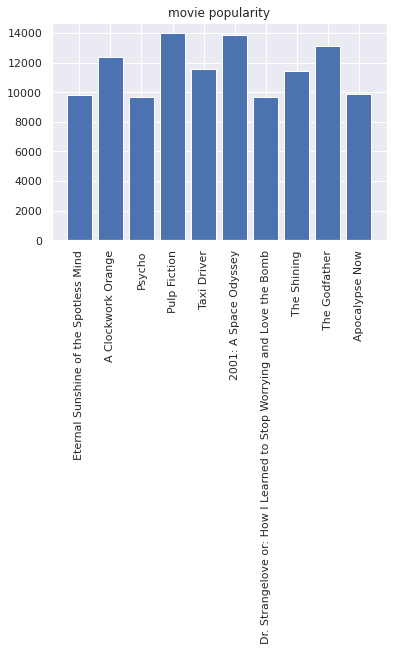

In [ ]:
plt.bar(pop_d2.movie_title,pop_d2.movie_popularity,label="Blue Bar",color='b',)
plt.plot()
plt.title('movie popularity')
plt.xticks(rotation=90)

Our group filter the movies that have a rating_score of 5.

In [ ]:
d3.loc[(d3['rating_score']==5.0)]


,movie_id,rating_id,rating_score,rating_timestamp_utc,critic,critic_likes,critic_comments,user_id,user_trialist,user_subscriber,user_eligible_for_trial,user_has_payment_method
10,1066,4247213,5.0,2010-12-25 22:24:24,NaN,0,0,84114365,False,False,True,False
24,1067,8761221,5.0,2012-12-30 20:02:21,One of the more harrowing viewing experiences ...,0,0,95094020,False,False,True,False
25,1067,8458056,5.0,2012-10-25 19:13:59,NaN,0,0,86451071,False,False,True,False
26,1067,6233230,5.0,2011-08-20 21:18:08,NaN,0,0,39115684,False,False,True,False
28,1067,4739252,5.0,2011-02-07 14:42:55,NaN,0,0,62878266,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15519966,1065,908680,5.0,2009-10-13 20:15:52,NaN,0,0,80265490,False,False,True,False
15519970,1065,830033,5.0,2009-09-30 10:15:33,NaN,0,0,72260852,False,False,True,False
15519985,1065,231740,5.0,2009-05-18 06:53:10,NaN,0,0,63976629,False,False,True,False
15519996,1065,84314,5.0,2008-12-26 05:37:00,NaN,0,0,70807566,False,False,True,False


From the bar chart, we can determine which list have the most followers.

        user_id  list_id  ... user_has_payment_method  list_followers__Rank
402    75084886     6657  ...                    True                   3.0
2230   61596227      115  ...                   False                  10.0
2303   61596227     5512  ...                   False                   1.0
3131    7614253      557  ...                   False                   9.0
3134    7614253    66024  ...                   False                   8.0
3206   91400208    10286  ...                   False                   7.0
7297   47671509    18729  ...                   False                   6.0
14298  73336965     7482  ...                    True                   2.0
48602  58669275    16625  ...                   False                   5.0
53297  86799281   108835  ...                    True                   4.0

[10 rows x 16 columns]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

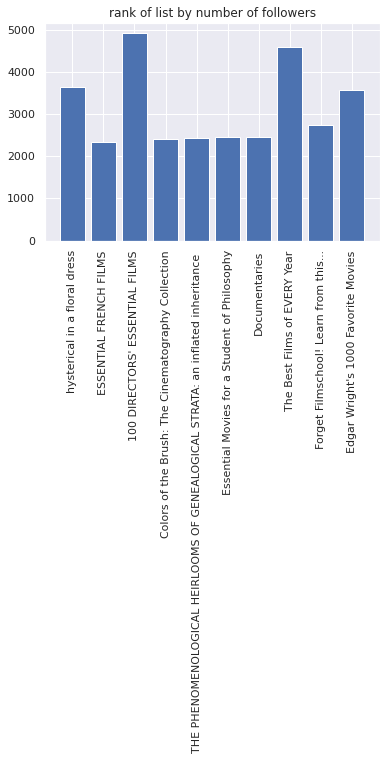

In [ ]:
m1['list_followers__Rank']=m1['list_followers'].rank(ascending=False)
fol_m1=m1.loc[(m1['list_followers__Rank']<=10.0)].copy()
print(fol_m1)

plt.bar(fol_m1.list_title,fol_m1.list_followers,label="Blue Bar",color='b',)
plt.plot()
plt.title('rank of list by number of followers')
plt.xticks(rotation=90)

In [ ]:
m1['list_comments__Rank']=m1['list_comments'].rank(ascending=False)
com_m1=m1.loc[(m1['list_followers__Rank']<=10.0)].copy()
print(com_m1)

        user_id  list_id  ... list_followers__Rank  list_comments__Rank
402    75084886     6657  ...                  3.0                  4.0
2230   61596227      115  ...                 10.0              44354.5
2303   61596227     5512  ...                  1.0               1398.5
3131    7614253      557  ...                  9.0                 53.0
3134    7614253    66024  ...                  8.0                570.0
3206   91400208    10286  ...                  7.0                 39.0
7297   47671509    18729  ...                  6.0                115.0
14298  73336965     7482  ...                  2.0                 53.0
48602  58669275    16625  ...                  5.0                354.0
53297  86799281   108835  ...                  4.0                  2.0

[10 rows x 17 columns]


From the bar chart, we can determine which movie has the largest number of comments.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

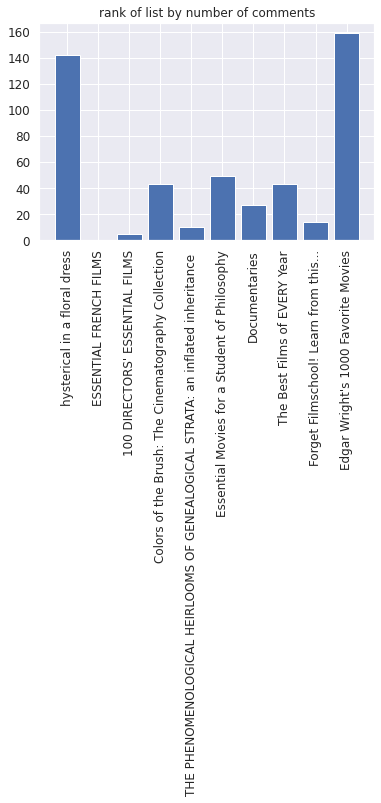

In [ ]:
plt.bar(fol_m1.list_title,fol_m1.list_comments,label="Blue Bar",color='b',)
plt.plot()
plt.title('rank of list by number of comments')
plt.xticks(rotation=90)

Our group decided to do linear regression on movie_release_year, rating_score, critic_comment and movie_popularity to predict the movie's popularity. To achieve, our group will first partition our dataset in a training and a test set. We will do an 70/30 partition using train_test_split. 

**Set Up**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Common imports
import numpy as np
import pandas as pd

from IPython.display import clear_output

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))


**Data Partition**

In [ ]:
from sklearn.model_selection import train_test_split
m2,test = train_test_split(m2,test_size=0.3,random_state=43)

Then we will drop the values that are null and perform feature normalization. 

In [ ]:
# Drop any rows with null values
m2.dropna(axis=0, how='any', inplace=True)
test.dropna(axis=0, how='any', inplace=True)

column_names = ['movie_release_year','rating_score','critic_comments']
X = m2[column_names]
y = m2['movie_popularity']

X_test = test[column_names]
y_test = test['movie_popularity']

Next we can perform linear regression and see how well we are able to predict the popularity of a movie. 

**Multivariate Linear Regression**

In [ ]:
#Fit Multivariate Linear Regression Model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

#Calculate the model's parameters error
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

params = pd.Series(model.coef_, index=X.columns)
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

                    effect  error
movie_release_year    -0.0    0.0
rating_score         145.0   53.0
critic_comments        0.0  155.0


From the table above, we can see that rating_score is positively related to movie_popularity. The parameters of rating_score means that for one point increase in the movie's rating_score, 145 ± 53 more movie_popularity this movie will get. The parameters of critic_comments suggests that for one more comments a movie get, 0 ± 155 more movie_popularity the movie will get. This might because the number of people who would like to leave comments after watching a movie is very small, so the critic_comments does not have large effect on movie_popularity. 

RMSE from Training=1062.0441


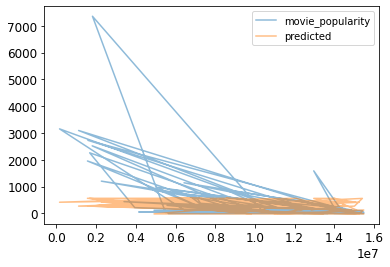

In [ ]:
RMSE_training_LR=np.sqrt(mean_squared_error(y,model.predict(X)))
print("RMSE from Training="+str(round(RMSE_training_LR,4)))

m2['predicted']=model.predict(X)
m2[['movie_popularity','predicted']].plot(alpha=0.5);

RMSE from Test=1915.9775


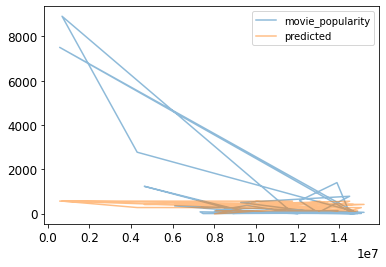

In [ ]:
test['predicted']=model.predict(X_test)
test[['movie_popularity','predicted']].plot(alpha=0.5);

RMSE_test_LR=np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
print("RMSE from Test="+str(round(RMSE_test_LR,4)))

From the two plots, our model does not predict very well. Our features might not be very complete or there are some nonlinear relationships we were failed to consider them. However, we can gain insights from the coefficients of our model, and we can know that rating_score is positively related to movie_popularity.
Our group also did ridge linear regression using skelearn's Pipeline.

**Ridge Linear Regression** 

In [ ]:
### START CODE HERE ### (≈ 9 lines of code)
lambda_term=10
Degree_of_the_Polynomial_Model=2
polybig_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
std_scaler = StandardScaler()
Ridge_lin_reg = Ridge(alpha=lambda_term)




ridge_regression_pipeline = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("Ridge_lin_reg", Ridge_lin_reg),
    ])

ridge_regression_pipeline.fit(X, y)
### END CODE HERE ###

#Calculate the model's parameters error
np.random.seed(1)
err = np.std([ridge_regression_pipeline.fit(*resample(X, y)).named_steps.Ridge_lin_reg.coef_
              for i in range(1000)], 0)

params = pd.Series(ridge_regression_pipeline.named_steps.Ridge_lin_reg.coef_, 
                   index=ridge_regression_pipeline.named_steps.poly_features.get_feature_names(X.columns))
pd.DataFrame({'effect': params.round(0),'error': err.round(0)})

,effect,error
movie_release_year,-25.0,69.0
rating_score,65.0,27.0
critic_comments,0.0,19.0
movie_release_year^2,-31.0,68.0
movie_release_year rating_score,61.0,27.0
movie_release_year critic_comments,0.0,19.0
rating_score^2,60.0,89.0
rating_score critic_comments,0.0,19.0
critic_comments^2,0.0,19.0


From the table above, we can conclude that one more year goes by, the movie popularity will decrease by 25 ± 69. It means the older movies will be more popular. 

RMSE Ridge LR from Training=1052.1848


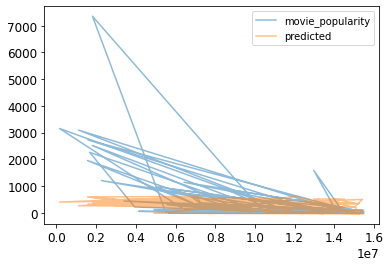

In [ ]:
#Calculate model RMSE
RMSE_training_Ridge=np.sqrt(mean_squared_error(y,ridge_regression_pipeline.predict(X)))
print("RMSE Ridge LR from Training="+str(round(RMSE_training_Ridge,4)))

#Plot predicted values 
m2['predicted']=ridge_regression_pipeline.predict(X)
m2[['movie_popularity','predicted']].plot(alpha=0.5);

RMSE Ridge LR from Test=1896.4349


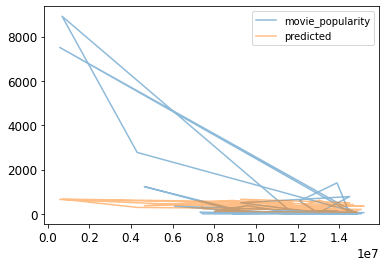

In [ ]:
RMSE_test_Ridge=np.sqrt(mean_squared_error(y_test,ridge_regression_pipeline.predict(X_test)))
print("RMSE Ridge LR from Test="+str(round(RMSE_test_Ridge,4)))

test['predicted']=ridge_regression_pipeline.predict(X_test)
test[['movie_popularity','predicted']].plot(alpha=0.5);

The model does not perform very well to predict the movie_popularity. It might because we did not use a lot of attributes. 

We also did lasso linear regression to predict the movie_popularity

**Lasso Linear Regression Exercise**

In [ ]:
### START CODE HERE ### (≈ 9 lines of code)
lambda_term=10
Degree_of_the_Polynomial_Model=2
Lasso_lin_reg = Lasso(alpha=lambda_term)
polybig_features = PolynomialFeatures(degree=Degree_of_the_Polynomial_Model, include_bias=False)
std_scaler = StandardScaler()
lasso_regression_pipeline = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("Lasso_lin_reg", Lasso_lin_reg),
    ])

lasso_regression_pipeline.fit(X, y)
### END CODE HERE ###

np.random.seed(1)
err = np.std([lasso_regression_pipeline.fit(*resample(X, y)).named_steps.Lasso_lin_reg.coef_
              for i in range(1000)], 0)

params = pd.Series(lasso_regression_pipeline.named_steps.Lasso_lin_reg.coef_, 
                   index=lasso_regression_pipeline.named_steps.poly_features.get_feature_names(X.columns))
table=pd.DataFrame({'effect': params.round(0),'error': err.round(0)})
table

,effect,error
movie_release_year,-135.0,147.0
rating_score,0.0,160.0
critic_comments,0.0,49.0
movie_release_year^2,-0.0,147.0
movie_release_year rating_score,0.0,152.0
movie_release_year critic_comments,0.0,32.0
rating_score^2,177.0,237.0
rating_score critic_comments,0.0,21.0
critic_comments^2,0.0,0.0


In [ ]:
table[ table['effect']!=0 ]

,effect,error
movie_release_year,-135.0,147.0
rating_score^2,177.0,237.0


From the table above, we can conclude that movie_release_year is negatively related to movie_popularity, and rating_score is positively related to movie_popularity. 

RMSE from Training=1035.9009


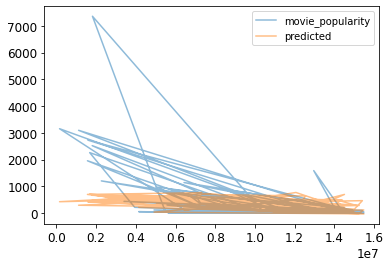

In [ ]:
RMSE_training_Lasso=np.sqrt(mean_squared_error(y, lasso_regression_pipeline.predict(X)))
print("RMSE from Training=" + str(round(RMSE_training_Lasso,4)))

m2['predicted'] = lasso_regression_pipeline.predict(X)
m2[['movie_popularity', 'predicted']].plot(alpha=0.5);

RMSE from Test=1858.4497


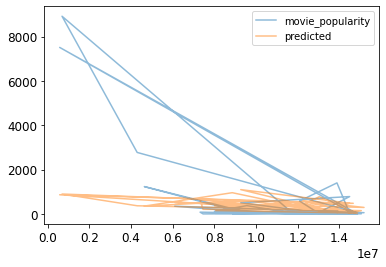

In [ ]:
RMSE_test_Lasso=np.sqrt(mean_squared_error(y_test, lasso_regression_pipeline.predict(X_test)))
print("RMSE from Test=" + str(round(RMSE_test_Lasso,4)))

test['predicted'] = lasso_regression_pipeline.predict(X_test)
test[['movie_popularity', 'predicted']].plot(alpha=0.5);

Our model does not predict movie popularity very well. That might because the attributes we used are not large enough, and in the real world, there are a lot of uncertainties that can affect movie popularity. 

# **5. Deployment**

The growth of the movie industry is tremendous. As shown in the histogram of movie released year, we can see that there is a sudden increase of the number of the movie released, because of the development of the internet and movie industry. However, as we can see from the rank of top 10 popular movies, most of them are relatively old movie. The percent of a “good movie” holds a relatively small percentage in most recent years. Therefore, finding “good movies” is a truly important and hard task. 

As we mentioned in the first section in Bussiness Understanding, one of the outstanding point of MUBI is its hand-curated selection on films. The process can ensure that users are recommended with great or at least above average level movies. And this is part of the reason for people to pay for the membership. One of the advantages of the hand-curated selection is that people can get touch with more diverse movies. Though, one possible drawback on hand-curated might be influenced  individual preference subjectively. The  movies which MUBI staff like may not fit the taste of their users. So while the pickers should somehow consider the general atheistic standard instead of personal preferences, review the online comments and expectations on different movies are also important. For example, 5 of the 30 movies recommend can be selected by Big Data, considering the preference of the user itself and market trend. Preference can be detected by the critique, viewing history, list the user participated.

At the same time, with the existence of the global community and rating system, MUBI should be able to find what people truly like and care about. And if they do some continuous reviews on that, they should be able to attract more customers through recommendations from old customers. However, from the average rating on movies, we could see MUBI may not spend enough efforts on doing that. It is totally understandable that different audience have different preferences. Some low rating doesn't indicate the movie is bad. But when look at the overall trend of rating, it doesn't seem really good. With the human selection, the overall rating of movies posted in MUBI should look better than now. Instead of having a slightly skew to higher rates, we expect to see higher scores. If MUBI can’t play to the strength of their characteristics, the gradual decline of the entire site is inevitable. If we look from another aspect, as soon as MUBI starts paying attention on that, they are in the path to success.

From the rank of comments and followers to list, we can see the number is much smaller compared with the number of people rate movies. The largest number of followers to list is 4914 and the largest number of comments to list is 19. From the rank on average rating score, we can see there are more than 3800 movies whose average rating scores are 5.0. The difference in scale is giant. We think the problem may locate at three parts. First, people are less likely to group movies like group songs, except some super fans of certain series movies. So from the basic level, movie list is less attractive to people. Second, most people will watch a movie after advertisement or recommendation from people around. Only part of the people will watch a movie when seeing the recommendation in the website. And even less people will review other's list and decide to watch certain movie. The usefulness of movie list in general sense is much weaker. Therefore, managers should strengthen it and use it in a good direction. They may scheme some activities based on the movie list; for instance, they can have some grants if people finish watching a whole series. Or, they can have some series question based on series movies or they can invite some critics to post some interesting ideas or in more professional way. These cannot only bring some attention to the movie list, but also ignite people's passion on watching movie and make MUBI more active. This also would attract new users to stay in the website, as a place to hear some voices.

Other than the website, we also do the research on the general movie industry. We use the linear regression line, exploring the factors of popular movies and even trying to predict the performance of the movie before releasing. We can see that movie release year is negatively related to the popular movies, which alert the current condition of movie industry, while everyone tries to make a profits instead of truly telling a story. Also we can see that the score the users of website is highly correlated to the popularity of the movies. However, these two variables are mutually influenced. The scoring will be influenced by common senses of the movies and other’s views; while higher score means better performance of the movie, then it becomes popular. 

By analyzing the data we have, and the table and graphs we created, we take a look at the movie industry in general. More specifically, we look at the MUBI website and explore top popular movies and top scoring movies. Additionally, we offer some suggestions to the website by looking at various datas to attract more users and stay website actively. 